Original shape: (466, 700)
Pooled shape: (233, 350)


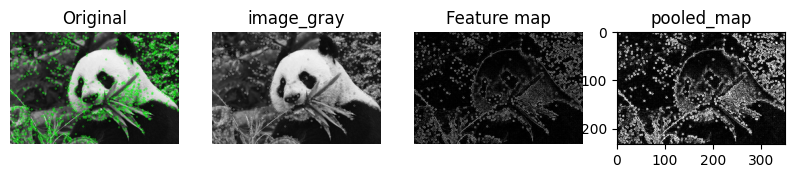

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = cv2.imread("./img2.png")  # shape: (H, W, 3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # optional, work with single channel

# Define a simple kernel (3x3 edge detection)
kernel = np.array([[ -1, -1, -1],
                   [ -1,  8, -1],
                   [ -1, -1, -1]], dtype=np.float32)

# Apply convolution
feature_map = cv2.filter2D(img_gray, -1, kernel)


# Define a simple kernel (3x3 edge detection)
# kernel2 = np.array([[ -1, -1, -1],
#                    [ -1,  8, -1],
#                    [ -1, -1, -1]], dtype=np.float32)
#
# feature_map2 = cv2.filter2D(feature_map, -1, kernel2)


def max_pooling(feature_map, pool_size=2, stride=2):
    h, w = feature_map.shape
    new_h = h // stride
    new_w = w // stride
    pooled = np.zeros((new_h, new_w), dtype=feature_map.dtype)

    for i in range(0, h, stride):
        for j in range(0, w, stride):
            window = feature_map[i:i+pool_size, j:j+pool_size]
            pooled[i//stride, j//stride] = np.max(window)

    return pooled

# Apply max pooling
pooled_map = max_pooling(feature_map, pool_size=2, stride=2)
print("Original shape:", feature_map.shape)
print("Pooled shape:", pooled_map.shape)



# Visualize
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.title("image_gray")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,4,3)
plt.title("Feature map")
plt.imshow(feature_map, cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.title("pooled_map")
plt.imshow(pooled_map, cmap='gray')
plt.show()


Original shape: (256, 256)
Feature map shape: (256, 256)
Pooled shape: (128, 128)


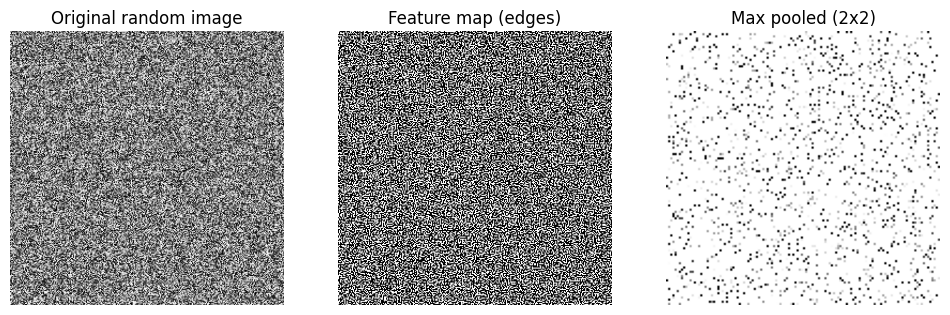

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generate a random high-contrast image (simulate edges everywhere)
random_state = 42
rng = np.random.default_rng(random_state)

# Generate random integer image
img = rng.integers(low=0, high=256, size=(256, 256), dtype=np.uint8)

# Apply edge detection kernel (simple Laplacian-like)
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]], dtype=np.float32)
feature_map = cv2.filter2D(img, -1, kernel)

# Define max pooling function
def max_pooling(feature_map, pool_size=2, stride=2):
    h, w = feature_map.shape
    new_h = h // stride
    new_w = w // stride
    pooled = np.zeros((new_h, new_w), dtype=feature_map.dtype)
    for i in range(0, h, stride):
        for j in range(0, w, stride):
            window = feature_map[i:i+pool_size, j:j+pool_size]
            pooled[i//stride, j//stride] = np.max(window)
    return pooled

# Apply max pooling
pooled_map = max_pooling(feature_map, pool_size=2, stride=2)

print("Original shape:", img.shape)
print("Feature map shape:", feature_map.shape)
print("Pooled shape:", pooled_map.shape)

# Visualize
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Original random image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Feature map (edges)")
plt.imshow(feature_map, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Max pooled (2x2)")
plt.imshow(pooled_map, cmap='gray')
plt.axis('off')

plt.show()
